# 🎓 Examen Final: SQL y Gestión de Datos (15 Puntos)

**Contexto:** Eres el Data Steward de la **Universidad Santo Tomás**. Se acerca el cierre de semestre y la decanatura requiere una gestión intensiva de la base de datos: desde registrar ofertas de última hora hasta generar los indicadores finales de deserción y carga académica.

**Instrucciones:**
* Asegúrate de tener el archivo **`universidad.db`** en esta misma carpeta.
* Cada punto tiene un valor de **1.0** sobre 15.
* Usa `conn.commit()` después de las sentencias de modificación (INSERT/UPDATE/DELETE).
* Usa `pd.read_sql_query` para las consultas de selección (SELECT).

---

In [1]:
# 🛠️ CONFIGURACIÓN INICIAL
import sqlite3
import pandas as pd
import os

db_filename = '../Datos/universidad.db'

if not os.path.exists(db_filename):
    print(f"⚠️ ERROR: No encuentro '{db_filename}'. Súbelo a esta carpeta.")
else:
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = ON;")
    print(f"✅ Conectado a '{db_filename}'. ¡Listo para el examen!")

✅ Conectado a '../Datos/universidad.db'. ¡Listo para el examen!


## 📝 Sección 1: Gestión Académica (DML) - 5 Puntos

**1. Apertura de Curso (INSERT)**
La facultad abre un nuevo curso electivo.
* Inserta en la tabla `Cursos`:
    * Nombre: **'Big Data & AI'**
    * Créditos: **5**
    * ID Profesor: **20**

**2. Nuevo Ingreso (INSERT)**
Registra a un nuevo estudiante en la tabla `Estudiantes`:
    * Nombre: **'Lionel'**
    * Apellido: **'Messi'**
    * Email: **'lio@usta.edu.co'**
    * Fecha Ingreso: '2024-11-25'

**3. Matrícula Manual (INSERT)**
Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI' que acabas de crear.
* *Pista:* Necesitarás averiguar primero qué ID le asignó la base de datos a Lionel y al curso.
* Nota final: `NULL`.

**4. Corrección de Créditos (UPDATE)**
El comité curricular decidió que 5 créditos es demasiado.
* Actualiza el curso 'Big Data & AI' para que tenga **3 créditos**.

**5. Retiro Definitivo (DELETE)**
El estudiante con **ID = 10** se retira de la universidad.
* Elimina todos sus registros de la tabla `Inscripciones` (para mantener la integridad, primero borramos sus clases).

In [ ]:
# Conocer los nombres de los campos de la tabla Cursos
pd.read_sql_query("PRAGMA table_info(Cursos);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id_curso,INTEGER,0,None,1
1,1,nombre_curso,TEXT,1,None,0
2,2,creditos,INTEGER,0,None,0
3,3,id_profesor,INTEGER,0,None,0


In [ ]:
# Conocer los nombres de los campos de la tabla Estudiantes
pd.read_sql_query("PRAGMA table_info(Estudiantes);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id_estudiante,INTEGER,0,None,1
1,1,nombre,TEXT,1,None,0
2,2,apellido,TEXT,1,None,0
3,3,email,TEXT,0,None,0
4,4,fecha_ingreso,DATE,0,None,0


In [ ]:
# Conocer los nombres de los campos de la tabla Inscripciones
pd.read_sql_query("PRAGMA table_info(Inscripciones);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id_inscripcion,INTEGER,0,None,1
1,1,id_estudiante,INTEGER,0,None,0
2,2,id_curso,INTEGER,0,None,0
3,3,fecha_inscripcion,DATE,0,None,0
4,4,nota_final,REAL,0,None,0


In [ ]:
# Espacio para Código DML (Recuerda hacer commit)
# 1. Apertura de Curso (INSERT)
try:
    cursor.execute("""
        INSERT INTO Cursos (nombre_curso, creditos, id_profesor)
        VALUES ('Big Data & AI', 5, 20);
    """)
    conn.commit()
    print("1. Curso 'Big Data & AI' insertado correctamente.")
except Exception as e:
    print(f"Error al insertar el curso: {e}")
# 2. Nuevo Ingreso (INSERT)
try:
    cursor.execute("""
        INSERT INTO Estudiantes (nombre, apellido, email, fecha_ingreso)
        VALUES ('Lionel', 'Messi', 'lib@usta.edu.co', '2024-11-25');
    """)
    conn.commit()
    print("2. Estudiante 'Lionel Messi' registrado correctamente.")
except Exception as e:
    print(f"2. Error al registrar el estudiante: {e}")

# 3. Matrícula Manual (INSERT)
try:
    # Obtener ID del estudiante Lionel Messi
    id_est = pd.read_sql_query("""
    SELECT id_estudiante 
    FROM Estudiantes
    WHERE nombre = 'Lionel' AND apellido = 'Messi';
""", conn).iloc[0,0]
    print(f"3. ID estudiante encontrado: {id_est}")
    
    # Obtener ID del curso Big Data & AI
    id_curso = pd.read_sql_query("""
    SELECT id_curso
    FROM Cursos
    WHERE nombre_curso = 'Big Data & AI';
""", conn).iloc[0,0]
    print(f"3. ID curso encontrado: {id_curso}")
            
    # Insertar matrícula
    cursor.execute(f"""
    INSERT INTO Inscripciones (id_estudiante, id_curso, nota_final)
    VALUES ({id_est}, {id_curso}, NULL);
    """)
    conn.commit()
    print("3. Matrícula realizada correctamente.")
except Exception as e:
    print(f"3. Error en la matrícula: {e}")



1. Curso 'Big Data & AI' insertado correctamente.
2. Estudiante 'Lionel Messi' registrado correctamente.
3. ID estudiante encontrado: 501
3. ID curso encontrado: 101
3. Matrícula realizada correctamente.


In [ ]:
# Verificación de resultados punto 1
pd.read_sql_query("SELECT * FROM Cursos;", conn)

,id_curso,nombre_curso,creditos,id_profesor
0,1,Bases de Datos,4,2
1,2,Economía Avanzado,5,1
2,3,Inglés II,4,9
3,4,Economía II,5,13
4,5,Arte Aplicado,4,15
...,...,...,...,...
96,97,Economía Avanzado,2,10
97,98,Derecho Avanzado,3,14
98,99,Inglés III,3,36
99,100,Cálculo I,2,25


In [ ]:
# Verificación de resultados punto 2
pd.read_sql_query("SELECT * FROM Estudiantes;", conn)

,id_estudiante,nombre,apellido,email,fecha_ingreso
0,1,Diego,Martinez,diego.martinez42@usantotomas.edu.co,2024-01-20
1,2,Lucia,Zainea,lucia.zainea87@usantotomas.edu.co,2024-01-20
2,3,Ricardo,Mendoza,ricardo.mendoza77@usantotomas.edu.co,2024-01-20
3,4,Ana,Rios,ana.rios10@usantotomas.edu.co,2024-01-20
4,5,Ana,Navarro,ana.navarro48@usantotomas.edu.co,2024-01-20
...,...,...,...,...,...
496,497,Jorge,Romero,jorge.romero11@usantotomas.edu.co,2024-01-20
497,498,Laura,Cardenas,laura.cardenas99@usantotomas.edu.co,2024-01-20
498,499,Felipe,Castillo,felipe.castillo36@usantotomas.edu.co,2024-01-20
499,500,David,Ruiz,david.ruiz90@usantotomas.edu.co,2024-01-20


In [ ]:
# Verificación de resultados punto 3
pd.read_sql_query("SELECT * FROM Inscripciones;", conn)

,id_inscripcion,id_estudiante,id_curso,fecha_inscripcion,nota_final
0,1,69,1,2024-02-01,3.8
1,2,298,1,2024-02-01,4.5
2,3,364,1,2024-02-01,1.9
3,4,116,1,2024-02-01,2.5
4,5,261,1,2024-02-01,2.5
...,...,...,...,...,...
2023,2024,500,38,2024-02-01,1.8
2024,2025,500,60,2024-02-01,2.9
2025,2026,500,8,2024-02-01,2.1
2026,2027,500,86,2024-02-01,2.6


In [10]:
# 4. Corrección de Créditos (UPDATE)
try:
    cursor.execute("""
        UPDATE Cursos 
        SET creditos = 3 
        WHERE nombre_curso = 'Big Data & AI';
    """)
    conn.commit()
    print("4. Créditos actualizados a 3 correctamente.")
except Exception as e:
    print(f"4. Error al actualizar créditos: {e}")

# 5. Retiro Definitivo (DELETE)
try:
    # Primero eliminar inscripciones del estudiante ID = 10
    cursor.execute("""
        DELETE FROM Inscripciones 
        WHERE ID_estudiante = 10;
    """)
    # Borrar el estudiante
    cursor.execute("""
        DELETE FROM Estudiantes
        WHERE id_estudiante = 10;
    """)
    conn.commit()
    print("5. Inscripciones del estudiante ID=10 eliminadas correctamente.")
except Exception as e:
    print(f"5. Error al eliminar inscripciones: {e}")

4. Créditos actualizados a 3 correctamente.
5. Inscripciones del estudiante ID=10 eliminadas correctamente.


In [ ]:
# Verificación de resultados punto 4
pd.read_sql_query("SELECT * FROM Cursos;", conn)

,id_curso,nombre_curso,creditos,id_profesor
0,1,Bases de Datos,4,2
1,2,Economía Avanzado,5,1
2,3,Inglés II,4,9
3,4,Economía II,5,13
4,5,Arte Aplicado,4,15
...,...,...,...,...
96,97,Economía Avanzado,2,10
97,98,Derecho Avanzado,3,14
98,99,Inglés III,3,36
99,100,Cálculo I,2,25


In [ ]:
# Verificación de resultados punto 5
pd.read_sql_query("SELECT * FROM Estudiantes;", conn)

,id_estudiante,nombre,apellido,email,fecha_ingreso
0,1,Diego,Martinez,diego.martinez42@usantotomas.edu.co,2024-01-20
1,2,Lucia,Zainea,lucia.zainea87@usantotomas.edu.co,2024-01-20
2,3,Ricardo,Mendoza,ricardo.mendoza77@usantotomas.edu.co,2024-01-20
3,4,Ana,Rios,ana.rios10@usantotomas.edu.co,2024-01-20
4,5,Ana,Navarro,ana.navarro48@usantotomas.edu.co,2024-01-20
...,...,...,...,...,...
495,497,Jorge,Romero,jorge.romero11@usantotomas.edu.co,2024-01-20
496,498,Laura,Cardenas,laura.cardenas99@usantotomas.edu.co,2024-01-20
497,499,Felipe,Castillo,felipe.castillo36@usantotomas.edu.co,2024-01-20
498,500,David,Ruiz,david.ruiz90@usantotomas.edu.co,2024-01-20


In [ ]:
# Verificación de resultados punto 5
pd.read_sql_query("SELECT * FROM Inscripciones;", conn)

,id_inscripcion,id_estudiante,id_curso,fecha_inscripcion,nota_final
0,1,69,1,2024-02-01,3.8
1,2,298,1,2024-02-01,4.5
2,3,364,1,2024-02-01,1.9
3,4,116,1,2024-02-01,2.5
4,5,261,1,2024-02-01,2.5
...,...,...,...,...,...
2019,2024,500,38,2024-02-01,1.8
2020,2025,500,60,2024-02-01,2.9
2021,2026,500,8,2024-02-01,2.1
2022,2027,500,86,2024-02-01,2.6


## 🔍 Sección 2: Consultas SQL (Analysis) - 6 Puntos

**6. Métricas Generales (Agregación)**
Calcula y muestra:
* Cantidad total de estudiantes.
* Cantidad total de cursos ofertados.
* Promedio de créditos de los cursos.

**7. Auditoría de Profesores (LEFT JOIN)**
Necesitamos ver la carga laboral completa.
* Lista **todos** los profesores (Nombre y Apellido) y el curso que dictan.
* **Condición:** Deben aparecer los profesores que **NO** tienen cursos asignados actualmente (valor NULL).

**8. Popularidad (GROUP BY)**
* Genera una lista con el `Nombre del Curso` y la **Cantidad de Estudiantes** inscritos en él.
* Ordena del más popular al menos popular.

**9. Cursos Masivos (HAVING)**
* Basado en la consulta anterior, filtra para mostrar solo los cursos que tienen **más de 20 estudiantes** inscritos.

**10. Búsqueda Inteligente (Subconsulta)**
* Obtén el nombre y apellido de los estudiantes inscritos en el curso **"Bases de Datos"**.
* **Reto:** No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.

**11. Sábana de Notas (INNER JOIN Múltiple)**
* Genera un reporte detallado que contenga:
    * Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor

In [ ]:
# Conocer los nombres de las tablas presentes en la base de datos
pd.read_sql_query("""
SELECT name 
FROM sqlite_master 
WHERE type='table';
""", conn)

,name
0,sqlite_sequence
1,Estudiantes
2,Profesores
3,Cursos
4,Inscripciones


In [ ]:
# Conocer los nombres de los campos de la tabla Profesores
pd.read_sql_query("PRAGMA table_info(Profesores);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id_profesor,INTEGER,0,None,1
1,1,nombre,TEXT,1,None,0
2,2,apellido,TEXT,1,None,0
3,3,especialidad,TEXT,0,None,0


In [24]:
# 6. Metricas generales
pd.read_sql_query("""
SELECT
    (SELECT COUNT(*) FROM Estudiantes) AS total_estudiantes,
    (SELECT COUNT(*) FROM Cursos) AS total_cursos,
    (SELECT AVG(creditos) FROM Cursos) AS promedio_creditos;
""", conn)

,total_estudiantes,total_cursos,promedio_creditos
0,500,101,2.70297


**Dado que los créditos son números enteros, el promedio obtenido (2.70297) debe redondearse, por lo que el valor final sería 3**

In [37]:
# 7. Auditoria de profesores
pd.read_sql_query("""
SELECT 
    P.nombre AS nombre_profesor,
    P.apellido AS apellido_profesor,
    C.nombre_curso
FROM Profesores P
LEFT JOIN Cursos C
    ON P.id_profesor = C.id_profesor
ORDER BY P.apellido, P.nombre;
""", conn)


,nombre_profesor,apellido_profesor,nombre_curso
0,Oscar,Cardenas,Historia III
1,Diego,Castillo,Estadística Avanzado
2,Diego,Castillo,Álgebra Básico
3,Paula,Castillo,Sociología Teórico
4,Ana,Diaz,Inglés II
...,...,...,...
107,Beatriz,Zainea,Sociología Teórico
108,Valeria,Zainea,Derecho Teórico
109,Valeria,Zainea,Filosofía Básico
110,Valeria,Zainea,Álgebra Básico


In [84]:
# 8. Popularidad de cursos
pd.read_sql_query("""
SELECT 
    C.nombre_curso,
    COUNT(I.id_estudiante) AS total_inscritos
FROM Cursos C
LEFT JOIN Inscripciones I
    ON C.id_curso = I.id_curso
GROUP BY C.nombre_curso
ORDER BY total_inscritos DESC;
""", conn)

,nombre_curso,total_inscritos
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61
...,...,...
59,Historia Avanzado,14
60,Estadística I,13
61,Arte I,13
62,Física Avanzado,12


In [85]:
# 9. Cursos masivos
pd.read_sql_query("""
SELECT 
    C.nombre_curso,
    COUNT(I.id_estudiante) AS total_inscritos
FROM Cursos C
LEFT JOIN Inscripciones I
    ON C.id_curso = I.id_curso
GROUP BY C.nombre_curso
HAVING COUNT(I.id_estudiante) > 20
ORDER BY total_inscritos DESC;
""", conn)

,nombre_curso,total_inscritos
0,Economía Avanzado,103
1,Ética Avanzado,83
2,Bases de Datos,70
3,Inglés Avanzado,62
4,Inglés III,61
5,Historia III,60
6,Derecho Avanzado,60
7,Biología I,60
8,Estadística Teórico,46
9,Sociología Teórico,43


In [30]:
# 10.Búsqueda Inteligente de Estudiantes
pd.read_sql_query("""
SELECT 
    E.nombre,
    E.apellido
FROM Estudiantes E
INNER JOIN Inscripciones I
    ON E.id_estudiante = I.id_estudiante
WHERE I.id_curso = (
    SELECT id_curso 
    FROM Cursos 
    WHERE nombre_curso = 'Bases de Datos'
);
""", conn)

,nombre,apellido
0,Diego,Martinez
1,Lucia,Zainea
2,Oscar,Mora
3,Fernando,Zainea
4,Valeria,Maya
...,...,...
65,David,Martinez
66,Nicolas,Mora
67,Hector,Ortega
68,Hector,Martinez


In [33]:
# 11.Sábana de Notas
pd.read_sql_query("""
SELECT 
    E.nombre AS nombre_estudiante,
    E.apellido AS apellido_estudiante,
    C.nombre_curso,
    I.nota_final,
    P.nombre AS nombre_profesor,
    P.apellido AS apellido_profesor
FROM Inscripciones I
INNER JOIN Estudiantes E
    ON I.id_estudiante = E.id_estudiante
INNER JOIN Cursos C
    ON I.id_curso = C.id_curso
INNER JOIN Profesores P
    ON C.id_profesor = P.id_profesor
ORDER BY nombre_curso, apellido_estudiante;
""", conn)

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor,apellido_profesor
0,Lucia,Cardenas,Arte Aplicado,2.1,Lucia,Romero
1,Ivan,Cardenas,Arte Aplicado,4.3,Lucia,Romero
2,Marta,Jimenez,Arte Aplicado,4.6,Lucia,Romero
3,Felipe,Lopez,Arte Aplicado,4.1,Lucia,Romero
4,Ana,Lopez,Arte Aplicado,3.2,Lucia,Romero
...,...,...,...,...,...,...
2019,Jorge,Silva,Ética III,2.1,David,Mora
2020,Mariana,Silva,Ética III,2.6,Andres,Rios
2021,Paula,Torres,Ética III,2.7,David,Mora
2022,Paula,Vargas,Ética III,3.0,David,Mora


## 📊 Sección 3: Analítica con Python (Pandas) - 4 Puntos

**12. Carga de Datos**
* Ejecuta la consulta del punto 11 (Sábana de Notas) y guárdala en un DataFrame llamado `df_notas`.
* Muestra las primeras 5 filas y usa `.info()` para verificar tipos de datos.

**13. Análisis de Riesgo**
* Filtra el DataFrame `df_notas` para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
* Guárdalos en un nuevo DF `df_riesgo` y cuenta cuántos son.

**14. Tabla Pivote (Cruce de Variables)**
* Crea una tabla dinámica que muestre el **Promedio de Notas** (values) organizados por `Nombre Curso` (index) y `Nombre Profesor` (columns).

**15. Visualización (Gráfico)**
* Usando el DataFrame `df_notas`, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
* *Opcional:* Un gráfico de barras con el Top 5 de cursos con más estudiantes.

In [39]:
# Espacio para Python / Pandas
# 12.Carga de datos
df_notas = pd.read_sql_query("""
SELECT 
    E.nombre AS nombre_estudiante,
    E.apellido AS apellido_estudiante,
    C.nombre_curso,
    I.nota_final,
    P.nombre AS nombre_profesor,
    P.apellido AS apellido_profesor
FROM Inscripciones I
INNER JOIN Estudiantes E
    ON I.id_estudiante = E.id_estudiante
INNER JOIN Cursos C
    ON I.id_curso = C.id_curso
INNER JOIN Profesores P
    ON C.id_profesor = P.id_profesor;
""", conn)

In [40]:
# Mostrar primeras filas
df_notas.head()

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor,apellido_profesor
0,Esteban,Perez,Bases de Datos,3.8,Andres,Rios
1,Mateo,Pineda,Bases de Datos,4.5,Andres,Rios
2,Elena,Navarro,Bases de Datos,1.9,Andres,Rios
3,Sofia,Mendoza,Bases de Datos,2.5,Andres,Rios
4,Elena,Gutierrez,Bases de Datos,2.5,Andres,Rios


In [41]:
# Ver tipos de datos
df_notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nombre_estudiante    2024 non-null   object 
 1   apellido_estudiante  2024 non-null   object 
 2   nombre_curso         2024 non-null   object 
 3   nota_final           2023 non-null   float64
 4   nombre_profesor      2024 non-null   object 
 5   apellido_profesor    2024 non-null   object 
dtypes: float64(1), object(5)
memory usage: 95.0+ KB


In [46]:
# 13.Análisis de riesgo
df_riesgo = df_notas[df_notas["nota_final"] < 3.0]
df_riesgo

,nombre_estudiante,apellido_estudiante,nombre_curso,nota_final,nombre_profesor,apellido_profesor
2,Elena,Navarro,Bases de Datos,1.9,Andres,Rios
3,Sofia,Mendoza,Bases de Datos,2.5,Andres,Rios
4,Elena,Gutierrez,Bases de Datos,2.5,Andres,Rios
7,Mateo,Silva,Bases de Datos,2.0,Andres,Rios
8,Jorge,Mora,Bases de Datos,1.9,Andres,Rios
...,...,...,...,...,...,...
2018,David,Ruiz,Arte II,2.4,Valeria,Pineda
2019,David,Ruiz,Inglés Avanzado,1.8,Kevin,Navarro
2020,David,Ruiz,Economía Básico,2.9,Marta,Maya
2021,David,Ruiz,Ética III,2.1,Andres,Rios


In [48]:
df_riesgo.shape[0]

847

In [52]:
# 14.Tabla pivote
df_notas["Profesor_Completo"] = df_notas["nombre_profesor"] + " " + df_notas["apellido_profesor"]
tabla_pivote = df_notas.pivot_table(
    values="nota_final",
    index="nombre_curso",
    columns="Profesor_Completo",
    aggfunc="mean"
)
tabla_pivote

Profesor_Completo,Ana Diaz,Ana Jimenez,Andres Navarro,Andres Rios,Beatriz Torres,Beatriz Zainea,Camila Martinez,Daniela Gutierrez,David Mora,David Silva,...,Nicolas Mendoza,Nicolas Ortega,Oscar Cardenas,Paula Castillo,Ricardo Perez,Valentina Diaz,Valentina Lopez,Valeria Maya,Valeria Pineda,Valeria Zainea
nombre_curso,,,,,,,,,,,,,,,,,,,,,
Arte Aplicado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte Avanzado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte I,NaN,NaN,NaN,2.969231,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arte II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Álgebra Básico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.066667
Álgebra General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.323333
Ética Avanzado,NaN,NaN,NaN,NaN,3.4625,NaN,NaN,NaN,NaN,NaN,...,NaN,3.031707,NaN,NaN,NaN,NaN,NaN,3.894444,NaN,NaN


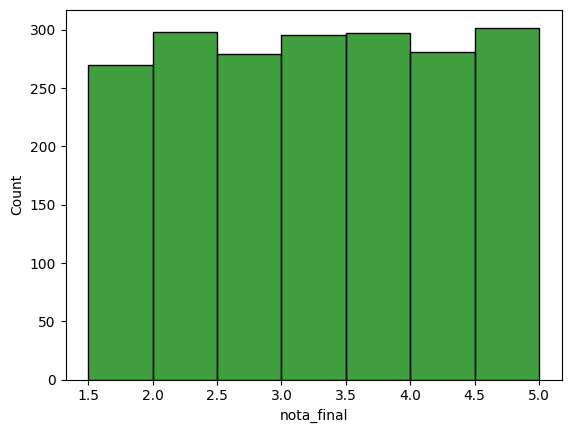

In [88]:
# 15.Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_notas, x="nota_final", bins=7, color="green")
plt.show()

**La distribución es bastante uniforme al utilizar este numero de bins**

In [75]:
top5 = (
    df_notas["nombre_curso"]
    .value_counts()
    .head(5)
    .reset_index()
)
top5.columns = ["Curso", "Total_Estudiantes"]

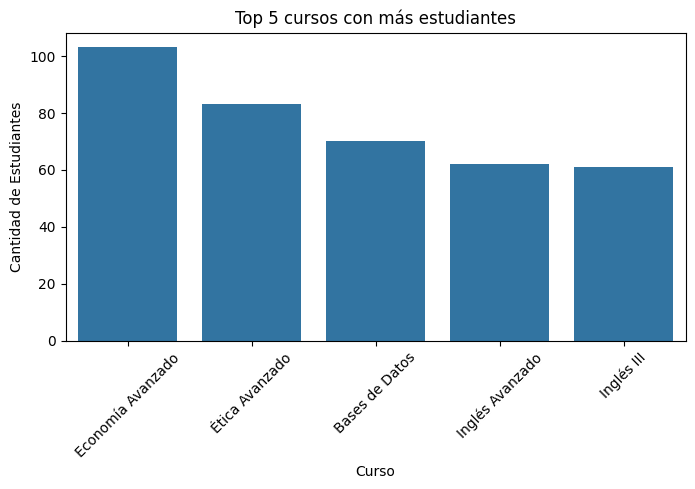

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(data=top5, x="Curso", y="Total_Estudiantes")
plt.title("Top 5 cursos con más estudiantes")
plt.xlabel("Curso")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45)
plt.show()

In [ ]:



conn.close()
print("¡Examen Finalizado!")